In [1]:
import rebound  #Tells python to use REBOUND, which is a code to integrate planets
import numpy as np #Tells python to use numpy (a common python science package)
import matplotlib.pyplot as plt #For plots
%matplotlib inline

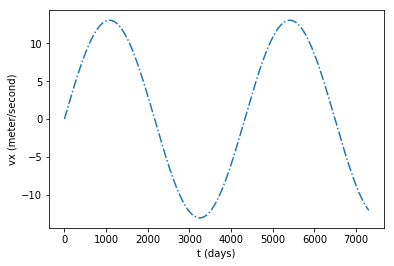

In [2]:
sim = rebound.Simulation() #we are naming our simulation 'sim'
sim.units = ('yr', 'AU', 'Msun') #this makes time in years, distances in AU, and mass in Sun's mass
sim.add(m=1) # Adds Sun (mass=1)
sim.add(m=0.001, a=5.20) # Jupiter (mass=.001*mass of Sun, distance=5.2AU)
sim.move_to_com() # This allows us to work in the center of mass frame.  If you don't do this, all particles can drift together
#sim.status()
Noutputs = 1000;
times = np.linspace(0,20,Noutputs) # This sets the "times" variable to be an array made up of 1000 evenly spaced output times between 0 and 20.
x_Jupiter = np.zeros(Noutputs) #This makes an array made up of zeros. We will be 'filling up' this array shortly with the x-position of Jupiter
y_Jupiter = np.zeros(Noutputs)
x_Sun = np.zeros(Noutputs)
y_Sun = np.zeros(Noutputs)
vx_sun = np.zeros(Noutputs) #x-velocity of the Sun
for i,t in enumerate(times): #each time through the loop, set i=0,1,... and t=times[0],times[1].,,
    sim.integrate(t)         # Integrate up to time t
    x_Jupiter[i] = sim.particles[1].x  # Jupiter is particle 1 in the list of particles. And the ".x" at the end says to use the x-position    
    y_Jupiter[i] = sim.particles[1].y
    x_Sun[i] = sim.particles[0].x #The Sun is particle 0
    y_Sun[i] = sim.particles[0].y
    vx_sun[i] = sim.particles[0].vx 
plt.plot(times*365.25,vx_sun*4743.7,'-.');#The number 4743.7 converts from AU/yr to meter/second
plt.xlabel('t (days)'); plt.ylabel('vx (meter/second)');    